In [70]:
# First import all the packages we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer
import string
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize 

from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier


# Question a

(comp.graphics, 584)
(comp.os.ms-windows.misc, 591)
(comp.sys.ibm.pc.hardware, 590)
(comp.sys.mac.hardware, 578)
(rec.autos, 594)
(rec.motorcycles, 598)
(rec.sport.baseball, 597)
(rec.sport.hockey, 600)
('Computer Technology ', 2343.0)
('Recreational Activity', 2389.0)


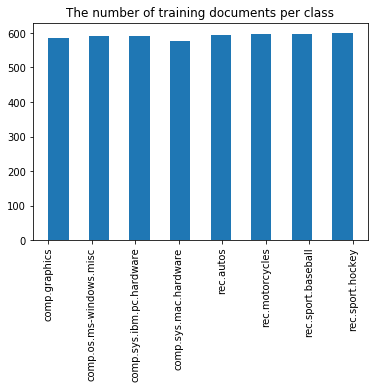

In [9]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers','footers','quotes'), shuffle=True, random_state=42)

doc = np.zeros(8)
category_index = train.target
for index in category_index:
    doc[index] += 1
for index in range(8):
    print ("(%s, %d)"%(categories[index],doc[index]))
doc0=doc[0]+doc[1]+doc[2]+doc[3]
doc1=doc[4]+doc[5]+doc[6]+doc[7]
print ("Computer Technology " , doc0)
print ("Recreational Activity" , doc1)

plt.hist(train.target, 15)
plt.title("The number of training documents per class")
x= np.arange(8)
plt.xticks(x,categories,rotation=90, fontsize=10)
plt.show()

# Question b

In [10]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers','footers','quotes'), shuffle=True, random_state=42)

In [11]:
stopwords = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english")
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

# pre-processing part
train.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in train.data]
for punctuation in EXTRA:
    train.data = [s.replace(punctuation, ' ') for s in train.data]
train.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in train.data]


In [12]:
count_vect = CountVectorizer(min_df=5, stop_words=stopwords)
train_counts = count_vect.fit_transform(train.data)
print "when min_df=5 "
print("extracted term number:", len(count_vect.get_feature_names()))
print(train_counts.shape)

tfidf_transform=TfidfTransformer()
train_tfidf=tfidf_transform.fit_transform(train_counts)
print(train_tfidf.shape)

when min_df=5 
('extracted term number:', 6910)
(4732, 6910)
(4732, 6910)


In [13]:
count_vect = CountVectorizer(min_df=2, stop_words=stopwords)
train_counts = count_vect.fit_transform(train.data)
print "when min_df=2 "
print("extracted term number:", len(count_vect.get_feature_names()))
print(train_counts.shape)
tfidf_transform=TfidfTransformer()
train_tfidf=tfidf_transform.fit_transform(train_counts)
print(train_tfidf.shape)

when min_df=2 
('extracted term number:', 16449)
(4732, 16449)
(4732, 16449)


# Question c

In [14]:
#from sklearn.feature_extraction.text import TfidfVectorizer
all_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

data_by_class = []
for i in range(20):
    data_by_class.append("")
for i in range(len(all_train.data)):
    category = all_train.target[i]
    data_by_class[category] = data_by_class[category] + " " + all_train.data[i]

# replace the \r \n \t as space for excluding them
data_by_class = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in data_by_class]
# exclude the punctuations
for punctuation in EXTRA:
    data_by_class = [s.replace(punctuation, ' ') for s in data_by_class]
# stemming
data_by_class = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in data_by_class]

count_vect = CountVectorizer(stop_words=stopwords)
data_by_class_counts = count_vect.fit_transform(data_by_class)
print("extracted term number:", len(count_vect.get_feature_names()))
print(data_by_class_counts.shape)

tfidf_transform=TfidfTransformer()
data_by_class_tfidf=tfidf_transform.fit_transform(data_by_class_counts)
print(data_by_class_tfidf.shape)


('extracted term number:', 107274)
(20, 107274)
(20, 107274)


In [15]:
def get_top_words(class_index):
    cur_class = data_by_class_tfidf.toarray()[class_index]
    top_ten_index = sorted(range(len(cur_class)), key=lambda index: cur_class[index])[-10:]
    top_tem_term = []
    for index in top_ten_index:
        top_tem_term.append(count_vect.get_feature_names()[index])
    return top_tem_term

In [16]:
class_names = all_train.target_names
ibm = class_names.index('comp.sys.ibm.pc.hardware')
mac = class_names.index('comp.sys.mac.hardware')
misc = class_names.index('misc.forsale')
christian = class_names.index('soc.religion.christian')


In [17]:
top_ten = get_top_words(ibm)
print "top ten terms for comp.sys.ibm.pc.hardware"
print (top_ten)

top ten terms for comp.sys.ibm.pc.hardware
[u'card', u'organ', u'subject', u'com', u'line', u'use', u'ide', u'edu', u'drive', u'scsi']


In [18]:
top_ten = get_top_words(mac)
print "top ten terms for comp.sys.mac.hardware "
print (top_ten)

top ten terms for comp.sys.mac.hardware 
[u'scsi', u'simm', u'appl', u'use', u'quadra', u'organ', u'subject', u'line', u'mac', u'edu']


In [19]:
top_ten = get_top_words(misc)
print "top ten terms for misc.forsale "
print (top_ten)

top ten terms for misc.forsale 
[u'com', u'univers', u'new', u'post', u'organ', u'subject', u'sale', u'line', u'00', u'edu']


In [20]:
top_ten = get_top_words(christian)
print "top ten terms for soc.religion.christian "
print (top_ten)

top ten terms for soc.religion.christian 
[u'believ', u'say', u'line', u'peopl', u'subject', u'church', u'jesus', u'edu', u'christian', u'god']


# Question d

In [21]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers','footers','quotes'), shuffle=True, random_state=42)

stopwords = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english")
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

# pre-processing part
train.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in train.data]
for punctuation in EXTRA:
    train.data = [s.replace(punctuation, ' ') for s in train.data]
train.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in train.data]

In [22]:
# min_df=2
count_vect = CountVectorizer(min_df=2, stop_words=stopwords)
train_counts = count_vect.fit_transform(train.data)

tfidf_transform=TfidfTransformer()
train_tfidf=tfidf_transform.fit_transform(train_counts)
print" when min_df=2 "
print(train_tfidf.shape)

 when min_df=2 
(4732, 16449)


In [23]:
# min_df=5
count_vect = CountVectorizer(min_df=5, stop_words=stopwords)
train_counts = count_vect.fit_transform(train.data)

tfidf_transform=TfidfTransformer()
train_tfidf=tfidf_transform.fit_transform(train_counts)
print" when min_df=5 "
print(train_tfidf.shape)

 when min_df=5 
(4732, 6910)


In [24]:
svd = TruncatedSVD(n_components=50, n_iter=10,random_state=42,algorithm='arpack')
train_svd = svd.fit_transform(train_tfidf)
print "applying lsi, train_svd.shape = ", train_svd.shape

applying lsi, train_svd.shape =  (4732, 50)


In [25]:
nmf = NMF(n_components=50, init='random', random_state=42)
train_nmf = nmf.fit_transform(train_tfidf)
print "applying nmf, train_nmf.shape = ", train_nmf.shape

applying nmf, train_nmf.shape =  (4732, 50)


# Question e

In [26]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

In [27]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [28]:
#divide the train.target to 2 classes
for i in range(len(train.target)):
    if train.target[i] >= 0 and train.target[i] <= 3:
        train.target[i] = 0
    else:
        train.target[i] = 1
#divide the test.target to 2 classes
for i in range(len(test.target)):
    if test.target[i] >= 0 and test.target[i] <= 3:
        test.target[i] = 0
    else:
        test.target[i] = 1

In [29]:
#pre-processing part
stopwords = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english")
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

# pre-processing for train.data
train.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in train.data]

for punctuation in EXTRA:
    train.data = [s.replace(punctuation, ' ') for s in train.data]

train.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in train.data]

###########################
# pre-processing for test.data

test.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in test.data]

for punctuation in EXTRA:
    test.data = [s.replace(punctuation, ' ') for s in test.data]

test.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in test.data]



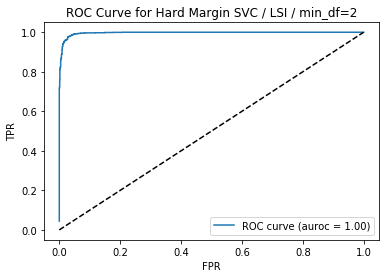

Result for Hard Margin SVC using LSI / min_df=2
confusion_matrix: 
[[1506   54]
 [  31 1559]]
accuracy = 0.973016, precision = 0.966522, recall＝ 0.980503


In [30]:
# hard svc / LSI /  min_df=2
hard_svc_clf = Pipeline([('vect', CountVectorizer(min_df=2, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('svd', TruncatedSVD(n_components=50, n_iter=10,random_state=42)),
                         ('clf', SVC(C = 1000, kernel='linear', probability=True)),
])

hard_svc_clf = hard_svc_clf.fit(train.data, train.target)
predicted_prob = hard_svc_clf.predict_proba(test.data)[:, 1]
predicted = hard_svc_clf.predict(test.data)


fpr, tpr, thresholds = roc_curve(test.target, predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Hard Margin SVC / LSI / min_df=2')
plt.legend(loc="lower right")
plt.show()


cm = confusion_matrix(test.target, predicted)
accuracy = accuracy_score(test.target, predicted)
precision = precision_score(test.target, predicted, pos_label = 1)
recall = recall_score(test.target, predicted, pos_label = 1)
print("Result for Hard Margin SVC using LSI / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

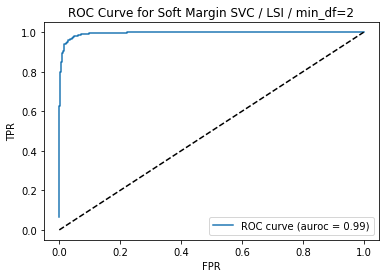

Result for Soft Margin SVC using LSI / min_df=2
confusion_matrix: 
[[   0 1560]
 [   0 1590]]
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000


In [31]:
# soft svc / LSI /  min_df=2
soft_svc_clf = Pipeline([('vect', CountVectorizer(min_df=2, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('svd', TruncatedSVD(n_components=50, n_iter=10,random_state=42)),
                         ('clf', SVC(C = 0.001, kernel='rbf', probability=True)),
])
soft_svc_clf = soft_svc_clf.fit(train.data, train.target)
predicted_prob = soft_svc_clf.predict_proba(test.data)[:, 1]
predicted = soft_svc_clf.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target, predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Soft Margin SVC / LSI / min_df=2')
plt.legend(loc="lower right")
plt.show()


cm = confusion_matrix(test.target, predicted)
accuracy = accuracy_score(test.target, predicted)
precision = precision_score(test.target, predicted, pos_label = 1)
recall = recall_score(test.target, predicted, pos_label = 1)
print("Result for Soft Margin SVC using LSI / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))


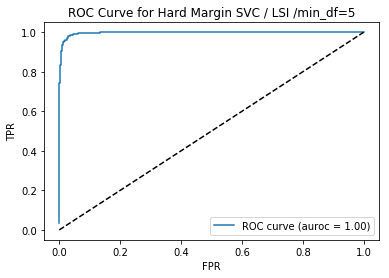

Result for Hard Margin SVC using LSI / min_df=5
confusion_matrix: 
[[1509   51]
 [  32 1558]]
accuracy = 0.973651, precision = 0.968303, recall＝ 0.979874


In [32]:
# hard svc / LSI /  min_df=5
hard_svc_clf = Pipeline([('vect', CountVectorizer(min_df=5, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('svd', TruncatedSVD(n_components=50, n_iter=10,random_state=42)),
                         ('clf', SVC(C = 1000, kernel='linear', probability=True)),
])

hard_svc_clf = hard_svc_clf.fit(train.data, train.target)
predicted_prob = hard_svc_clf.predict_proba(test.data)[:, 1]
predicted = hard_svc_clf.predict(test.data)


fpr, tpr, thresholds = roc_curve(test.target, predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Hard Margin SVC / LSI /min_df=5')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, predicted)
accuracy = accuracy_score(test.target, predicted)
precision = precision_score(test.target, predicted, pos_label = 1)
recall = recall_score(test.target, predicted, pos_label = 1)
print("Result for Hard Margin SVC using LSI / min_df=5")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

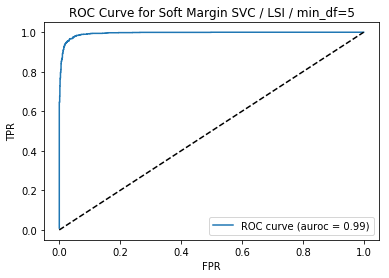

Result for Soft Margin SVC using LSI / min_df=5
confusion_matrix: 
[[   0 1560]
 [   0 1590]]
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000


In [33]:
# soft svc / LSI /  min_df=5
soft_svc_clf = Pipeline([('vect', CountVectorizer(min_df=5, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('svd', TruncatedSVD(n_components=50, n_iter=10,random_state=42)),
                         ('clf', SVC(C = 0.001, kernel='rbf', probability=True)),
])
soft_svc_clf = soft_svc_clf.fit(train.data, train.target)
predicted_prob = soft_svc_clf.predict_proba(test.data)[:, 1]
predicted = soft_svc_clf.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target, predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Soft Margin SVC / LSI / min_df=5')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, predicted)
accuracy = accuracy_score(test.target, predicted)
precision = precision_score(test.target, predicted, pos_label = 1)
recall = recall_score(test.target, predicted, pos_label = 1)
print("Result for Soft Margin SVC using LSI / min_df=5")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

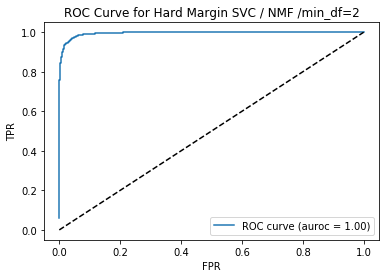

Result for Hard Margin SVC using NMF / min_df=2
confusion_matrix: 
[[1493   67]
 [  46 1544]]
accuracy = 0.964127, precision = 0.958411, recall＝ 0.971069


In [34]:
# hard svc / NMF/  min_df=2
hard_svc_clf = Pipeline([('vect', CountVectorizer(min_df=2, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('nmf', NMF(n_components=50, init='random', random_state=42)),
                         ('clf', SVC(C = 1000, kernel='linear', probability=True)),
])

hard_svc_clf = hard_svc_clf.fit(train.data, train.target)
predicted_prob = hard_svc_clf.predict_proba(test.data)[:, 1]
predicted = hard_svc_clf.predict(test.data)
fpr, tpr, thresholds = roc_curve(test.target, predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Hard Margin SVC / NMF /min_df=2')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, predicted)
accuracy = accuracy_score(test.target, predicted)
precision = precision_score(test.target, predicted, pos_label = 1)
recall = recall_score(test.target, predicted, pos_label = 1)
print("Result for Hard Margin SVC using NMF / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

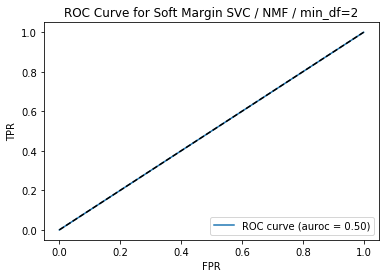

Result for Soft Margin SVC using NMF / min_df=2
confusion_matrix: 
[[   0 1560]
 [   0 1590]]
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000


In [35]:
# soft svc / NMF/  min_df=2
soft_svc_clf = Pipeline([('vect', CountVectorizer(min_df=2, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('nmf', NMF(n_components=50, init='random', random_state=42)),
                         ('clf', SVC(C = 0.001, kernel='rbf', probability=True)),
])
soft_svc_clf = soft_svc_clf.fit(train.data, train.target)
predicted_prob = soft_svc_clf.predict_proba(test.data)[:, 1]
predicted = soft_svc_clf.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target, predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Soft Margin SVC / NMF / min_df=2')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, predicted)
accuracy = accuracy_score(test.target, predicted)
precision = precision_score(test.target, predicted, pos_label = 1)
recall = recall_score(test.target, predicted, pos_label = 1)
print("Result for Soft Margin SVC using NMF / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))


# Question f

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [38]:
#divide the train.target to 2 classes
for i in range(len(train.target)):
    if train.target[i] >= 0 and train.target[i] <= 3:
        train.target[i] = 0
    else:
        train.target[i] = 1
#divide the test.target to 2 classes
for i in range(len(test.target)):
    if test.target[i] >= 0 and test.target[i] <= 3:
        test.target[i] = 0
    else:
        test.target[i] = 1

In [39]:
stopwords = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english")
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

# replace the \r \n \t as space for excluding them
train.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in train.data]

# exclude the punctuations
for punctuation in EXTRA:
    train.data = [s.replace(punctuation, ' ') for s in train.data]

# stemming
train.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in train.data]

###########################
# replace the \r \n \t as space for excluding them
test.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in test.data]

# exclude the punctuations
for punctuation in EXTRA:
    test.data = [s.replace(punctuation, ' ') for s in test.data]

# stemming
test.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in test.data]



In [40]:
c = [0.001,0.01,0.1,1,10,100,1000]

print "-----using LSI/ min_df=2------"
for c_value in c:
    svc_clf = Pipeline([('vect', CountVectorizer(min_df=2, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('svd', TruncatedSVD(n_components=50, n_iter=10,random_state=42)),
                         ('clf', SVC(C=c_value , kernel='rbf', probability=True)),
])
    svc_clf = svc_clf.fit(train.data, train.target)
    #dicted_prob = svc_clf.predict_proba(test.data)[:, 1]
    
    sm_scores = cross_val_score(svc_clf, test.data, test.target, cv=5)
    ave_score = np.mean(sm_scores)
    predicted = svc_clf.predict(test.data)
    
    print "C value = {}, ave_score = {}".format(c_value,ave_score)
    #cm = confusion_matrix(test.target, predicted)
    accuracy = accuracy_score(test.target, predicted)
    precision = precision_score(test.target, predicted, pos_label = 1)
    recall = recall_score(test.target, predicted, pos_label = 1)
    print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))


-----using LSI/ min_df=2------
C value = 0.001, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 0.01, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 0.1, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 1, ave_score = 0.939682539683
accuracy = 0.958730, precision = 0.932464, recall＝ 0.989937
C value = 10, ave_score = 0.973333333333
accuracy = 0.966984, precision = 0.956388, recall＝ 0.979245
C value = 100, ave_score = 0.977777777778
accuracy = 0.973968, precision = 0.966007, recall＝ 0.983019
C value = 1000, ave_score = 0.983492063492
accuracy = 0.973016, precision = 0.967101, recall＝ 0.979874


In [41]:
c = [0.001,0.01,0.1,1,10,100,1000]

print "-----using NMF/ min_df=2------"
for c_value in c:
    svc_clf = Pipeline([('vect', CountVectorizer(min_df=2, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('nmf', NMF(n_components=50, init='random', random_state=42)),
                         ('clf', SVC(C=c_value , kernel='rbf', probability=True)),
])
    svc_clf = svc_clf.fit(train.data, train.target)
    #dicted_prob = svc_clf.predict_proba(test.data)[:, 1]
    
    sm_scores = cross_val_score(svc_clf, test.data, test.target, cv=5)
    ave_score = np.mean(sm_scores)
    predicted = svc_clf.predict(test.data)
    
    print "C value = {}, ave_score = {}".format(c_value,ave_score)
    #cm = confusion_matrix(test.target, predicted)
    accuracy = accuracy_score(test.target, predicted)
    precision = precision_score(test.target, predicted, pos_label = 1)
    recall = recall_score(test.target, predicted, pos_label = 1)
    print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))



-----using NMF/ min_df=2------
C value = 0.001, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 0.01, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 0.1, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 1, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 10, ave_score = 0.716825396825
accuracy = 0.930794, precision = 0.922414, recall＝ 0.942138
C value = 100, ave_score = 0.958095238095
accuracy = 0.946984, precision = 0.928873, recall＝ 0.969182
C value = 1000, ave_score = 0.965079365079
accuracy = 0.959365, precision = 0.950123, recall＝ 0.970440


In [42]:
c = [0.001,0.01,0.1,1,10,100,1000]

print "------using LSI/ min_df=5------"
for c_value in c:
    svc_clf = Pipeline([('vect', CountVectorizer(min_df=5, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('svd', TruncatedSVD(n_components=50, n_iter=10,random_state=42)),
                         ('clf', SVC(C=c_value , kernel='rbf', probability=True)),
])
    svc_clf = svc_clf.fit(train.data, train.target)
    #dicted_prob = svc_clf.predict_proba(test.data)[:, 1]
    
    sm_scores = cross_val_score(svc_clf, test.data, test.target, cv=5)
    ave_score = np.mean(sm_scores)
    predicted = svc_clf.predict(test.data)
    
    print "C value = {}, ave_score = {}".format(c_value,ave_score)
    #cm = confusion_matrix(test.target, predicted)
    accuracy = accuracy_score(test.target, predicted)
    precision = precision_score(test.target, predicted, pos_label = 1)
    recall = recall_score(test.target, predicted, pos_label = 1)
    print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))



------using LSI/ min_df=5------
C value = 0.001, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 0.01, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 0.1, ave_score = 0.504761904762
accuracy = 0.504762, precision = 0.504762, recall＝ 1.000000
C value = 1, ave_score = 0.952063492063
accuracy = 0.955873, precision = 0.928024, recall＝ 0.989308
C value = 10, ave_score = 0.973333333333
accuracy = 0.970159, precision = 0.957772, recall＝ 0.984277
C value = 100, ave_score = 0.97873015873
accuracy = 0.974603, precision = 0.966625, recall＝ 0.983648
C value = 1000, ave_score = 0.982222222222
accuracy = 0.973651, precision = 0.968886, recall＝ 0.979245


In [43]:
from sklearn import metrics
#based on the result use C = 1000 as the best value below:
svc_clf = Pipeline([('vect', CountVectorizer(min_df=2, stop_words=text.ENGLISH_STOP_WORDS)),
                         ('tfidf', TfidfTransformer()),
                         ('svd', TruncatedSVD(n_components=50, n_iter=10,random_state=42)),
                         ('clf', SVC(C=1000 , kernel='rbf', probability=True)),
])
svc_clf = svc_clf.fit(train.data, train.target)
#dicted_prob = svc_clf.predict_proba(test.data)[:, 1]
predicted = svc_clf.predict(test.data)

target_names = ['comp', 'rec']
print "Based on the result we use C = 1000 as the best value below; shown with LSI and min_df=2"
print ""
print "Accuracy: {}".format(np.mean(predicted == test.target))
print ""
print "Classification report:"
print metrics.classification_report(test.target, predicted, target_names=target_names)
print ""
print "Confusion matrix:"
print metrics.confusion_matrix(test.target, predicted)
print ""

Based on the result we use C = 1000 as the best value below; shown with LSI and min_df=2

Accuracy: 0.973015873016

Classification report:
             precision    recall  f1-score   support

       comp       0.98      0.97      0.97      1560
        rec       0.97      0.98      0.97      1590

avg / total       0.97      0.97      0.97      3150


Confusion matrix:
[[1507   53]
 [  32 1558]]



# Question g

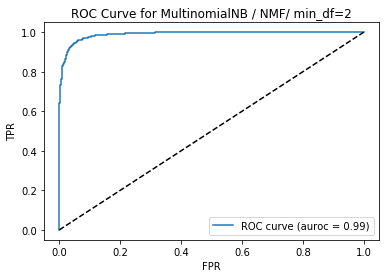

In [44]:
#part g
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import string
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.feature_extraction import text
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import NMF


categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

#divide the train.target to 2 classes
for i in range(len(train.target)):
    if train.target[i] >= 0 and train.target[i] <= 3:
        train.target[i] = 0
    else:
        train.target[i] = 1
#divide the test.target to 2 classes
for i in range(len(test.target)):
    if test.target[i] >= 0 and test.target[i] <= 3:
        test.target[i] = 0
    else:
        test.target[i] = 1
       
 ##preprocessing
stopwords = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english")
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

#train.data preprocessing
# replace the \r \n \t as space for excluding them
train.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in train.data]

# exclude the punctuations
for punctuation in EXTRA:
    train.data = [s.replace(punctuation, ' ') for s in train.data]

# stemming
train.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in train.data]

###########################
#test.data preprocessing
# replace the \r \n \t as space for excluding them
test.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in test.data]

# exclude the punctuations
for punctuation in EXTRA:
    test.data = [s.replace(punctuation, ' ') for s in test.data]

# stemming
test.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in test.data]
#print ("cell1-finish")
nb=MultinomialNB()
nb.class_prior_=[0.1,0.9]
pipeline1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('reduce_dim',NMF(n_components=50,init='random',random_state=0)),('clf',nb),])

mnb_clf=pipeline1.fit(train.data,train.target)
mnb_predicted_prob=pipeline1.predict_proba(test.data)[:,1]
mnb_predicted=pipeline1.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,mnb_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for MultinomialNB / NMF/ min_df=2')
plt.legend(loc="lower right")
plt.show()


In [45]:
cm = confusion_matrix(test.target, mnb_predicted)
accuracy = accuracy_score(test.target, mnb_predicted)
precision = precision_score(test.target, mnb_predicted, pos_label = 1)
recall = recall_score(test.target, mnb_predicted, pos_label = 1)
print("Result for MultinomialNB using NMF / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))



Result for MultinomialNB using NMF / min_df=2
confusion_matrix: 
[[1400  160]
 [  35 1555]]
accuracy = 0.938095, precision = 0.906706, recall＝ 0.977987


# Question h

In [71]:

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

#divide the train.target to 2 classes
for i in range(len(train.target)):
    if train.target[i] >= 0 and train.target[i] <= 3:
        train.target[i] = 0
    else:
        train.target[i] = 1
#divide the test.target to 2 classes
for i in range(len(test.target)):
    if test.target[i] >= 0 and test.target[i] <= 3:
        test.target[i] = 0
    else:
        test.target[i] = 1
       
 ##preprocessing
stopwords = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english")
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

#train.data preprocessing
# replace the \r \n \t as space for excluding them
train.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in train.data]

# exclude the punctuations
for punctuation in EXTRA:
    train.data = [s.replace(punctuation, ' ') for s in train.data]

# stemming
train.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in train.data]

###########################
#test.data preprocessing
# replace the \r \n \t as space for excluding them
test.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in test.data]

# exclude the punctuations
for punctuation in EXTRA:
    test.data = [s.replace(punctuation, ' ') for s in test.data]

# stemming
test.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in test.data]
#print ("cell1-finish")

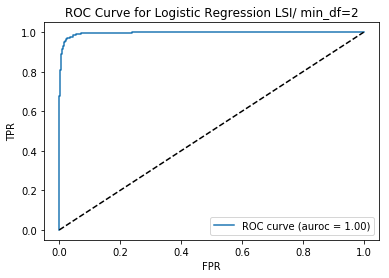

Result for Logistic Regression LSI/min_df=2
confusion_matrix: 
[[1492   68]
 [  35 1555]]
accuracy = 0.967302, precision = 0.958102, recall＝ 0.977987


In [72]:

#logical regression LSI case min_df=2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
logreg=LogisticRegression()

pipeline2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),
                    ('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),
                    ('clf',logreg),]) 

logreg_clf=pipeline2.fit(train.data,train.target)
logreg_predicted_prob=pipeline2.predict_proba(test.data)[:,1]
logreg_predicted=pipeline2.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,logreg_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Logistic Regression LSI/ min_df=2')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, logreg_predicted)
accuracy = accuracy_score(test.target, logreg_predicted)
precision = precision_score(test.target, logreg_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_predicted, pos_label = 1)
print("Result for Logistic Regression LSI/min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))




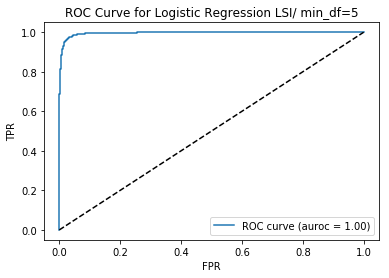

Result for Logistic Regression LSI /min_df=5
confusion_matrix: 
[[1492   68]
 [  30 1560]]
accuracy = 0.968889, precision = 0.958231, recall＝ 0.981132


In [47]:
## #logical regression LSI case min_df= 5
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
logreg=LogisticRegression()

pipeline2=Pipeline([('vect',CountVectorizer(min_df=5, stop_words='english')),
                    ('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),
                    ('clf',logreg),]) #min_df=5

logreg_clf=pipeline2.fit(train.data,train.target)
logreg_predicted_prob=pipeline2.predict_proba(test.data)[:,1]
logreg_predicted=pipeline2.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,logreg_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Logistic Regression LSI/ min_df=5')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, logreg_predicted)
accuracy = accuracy_score(test.target, logreg_predicted)
precision = precision_score(test.target, logreg_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_predicted, pos_label = 1)
print("Result for Logistic Regression LSI /min_df=5")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))




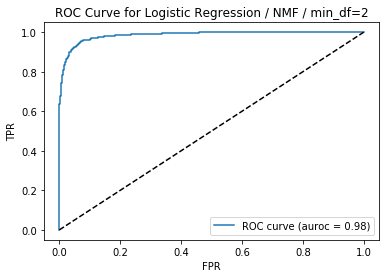

Result for Logistic Regression / NMF / min_df=2
confusion_matrix: 
[[1450  110]
 [  74 1516]]
accuracy = 0.941587, precision = 0.932349, recall＝ 0.953459


In [48]:
#logical regression / NMF / min_df=2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
logreg=LogisticRegression()

pipeline2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                     ('reduce_dim',NMF(n_components=50,init='random',random_state=0)),('clf',logreg),]) #min_df=5

logreg_clf=pipeline2.fit(train.data,train.target)
logreg_predicted_prob=pipeline2.predict_proba(test.data)[:,1]
logreg_predicted=pipeline2.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,logreg_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Logistic Regression / NMF / min_df=2')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, logreg_predicted)
accuracy = accuracy_score(test.target, logreg_predicted)
precision = precision_score(test.target, logreg_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_predicted, pos_label = 1)
print("Result for Logistic Regression / NMF / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))



# Question i1

In [ ]:

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

#divide the train.target to 2 classes
for i in range(len(train.target)):
    if train.target[i] >= 0 and train.target[i] <= 3:
        train.target[i] = 0
    else:
        train.target[i] = 1
#divide the test.target to 2 classes
for i in range(len(test.target)):
    if test.target[i] >= 0 and test.target[i] <= 3:
        test.target[i] = 0
    else:
        test.target[i] = 1
       
 ##preprocessing
stopwords = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english")
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

#train.data preprocessing
# replace the \r \n \t as space for excluding them
train.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in train.data]

# exclude the punctuations
for punctuation in EXTRA:
    train.data = [s.replace(punctuation, ' ') for s in train.data]

# stemming
train.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in train.data]

###########################
#test.data preprocessing
# replace the \r \n \t as space for excluding them
test.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in test.data]

# exclude the punctuations
for punctuation in EXTRA:
    test.data = [s.replace(punctuation, ' ') for s in test.data]

# stemming
test.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in test.data]
#print ("cell1-finish")

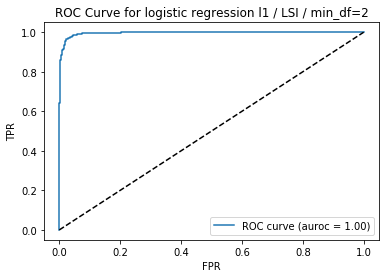

Result for logreg_l1 / LSI / min_df=2
confusion_matrix: 
[[1495   65]
 [  33 1557]]
accuracy = 0.968889, precision = 0.959926, recall＝ 0.953459


In [49]:

#l1 lsi / min_df=2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
logreg_l1=LogisticRegression(penalty='l1',C=1,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l1),]) #change 2 to 5 for min_df=5

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,logreg_l1_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for logistic regression l1 / LSI / min_df=2')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 / LSI / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))



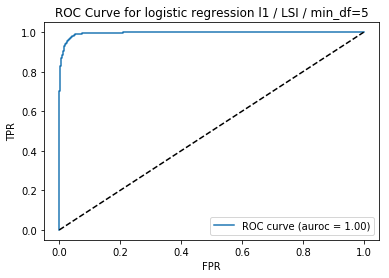

Result for logreg_l1 / LSI / min_df=5
confusion_matrix: 
[[1495   65]
 [  33 1557]]
accuracy = 0.968889, precision = 0.959926, recall＝ 0.953459


In [50]:
#l1 lsi / min_df=5
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
logreg_l1=LogisticRegression(penalty='l1',C=1,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=5, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l1),]) #change 2 to 5 for min_df=5

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,logreg_l1_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for logistic regression l1 / LSI / min_df=5')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 / LSI / min_df=5")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))




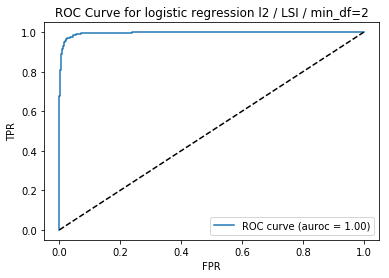

Result for logreg_l2/ LSI / min_df=2
confusion_matrix: 
[[1492   68]
 [  35 1555]]
accuracy = 0.967302, precision = 0.958102, recall＝ 0.977987


In [51]:
#l2 lsi / min_df=2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

logreg_l2=LogisticRegression(penalty='l2',C=1,solver='liblinear')

pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l2),]) #change 2 to 5 for min_df=5

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,logreg_l2_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for logistic regression l2 / LSI / min_df=2')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print("Result for logreg_l2/ LSI / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))



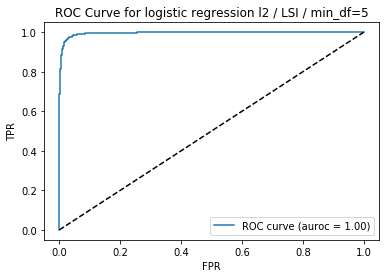

Result for logreg_l2/ LSI / min_df=5
confusion_matrix: 
[[1492   68]
 [  30 1560]]
accuracy = 0.968889, precision = 0.958231, recall＝ 0.981132


In [52]:
#l2 lsi / min_df=5
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

logreg_l2=LogisticRegression(penalty='l2',C=1,solver='liblinear')

pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=5, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l2),]) #change 2 to 5 for min_df=5

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,logreg_l2_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for logistic regression l2 / LSI / min_df=5')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print("Result for logreg_l2/ LSI / min_df=5")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))




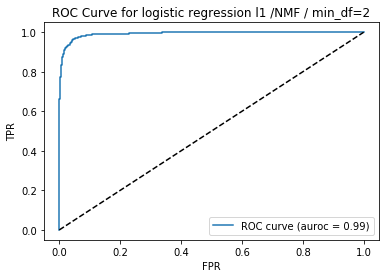

Result for logreg_l1 /NMF / min_df=2
confusion_matrix: 
[[1485   75]
 [  55 1535]]
accuracy = 0.958730, precision = 0.953416, recall＝ 0.953459


In [53]:
#NMF l1
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
logreg_l1=LogisticRegression(penalty='l1',C=1,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                   ('reduce_dim',NMF(n_components=50,init='random',random_state=0)) ,('clf',logreg_l1),])

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,logreg_l1_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for logistic regression l1 /NMF / min_df=2')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 /NMF / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))



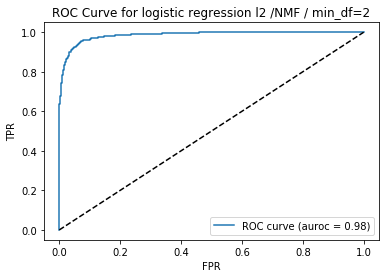

Result for logreg_l2 /NMF / min_df=2
confusion_matrix: 
[[1450  110]
 [  74 1516]]
accuracy = 0.941587, precision = 0.932349, recall＝ 0.953459


In [54]:
#NMF l2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

logreg_l2=LogisticRegression(penalty='l2',C=1,solver='liblinear')

pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('reduce_dim',NMF(n_components=50,init='random',random_state=0)),('clf',logreg_l2),])

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)

fpr, tpr, thresholds = roc_curve(test.target,logreg_l2_predicted_prob)
auroc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for logistic regression l2 /NMF / min_df=2')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print("Result for logreg_l2 /NMF / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

In [55]:
#test with differenct c value / L1


from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

logreg_l1=LogisticRegression(penalty='l1',C=0.001,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l1),]) #change 2 to 5 for min_df=5

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)


cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 /c=0.001")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

logreg_l1=LogisticRegression(penalty='l1',C=0.01,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l1),]) #change 2 to 5 for min_df=5

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)


cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 /c=0.01")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

logreg_l1=LogisticRegression(penalty='l1',C=0.1,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l1),]) #change 2 to 5 for min_df=5

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)


cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 /c=0.1")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

logreg_l1=LogisticRegression(penalty='l1',C=1,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l1),]) #change 2 to 5 for min_df=5

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)


cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 /c=1")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

logreg_l1=LogisticRegression(penalty='l1',C=10,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l1),]) #change 2 to 5 for min_df=5

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)


cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 /c=10")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))


logreg_l1=LogisticRegression(penalty='l1',C=100,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l1),]) #change 2 to 5 for min_df=5

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)


cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 /c=100")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

logreg_l1=LogisticRegression(penalty='l1',C=1000,solver='liblinear')


pipeline3_l1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l1),]) #change 2 to 5 for min_df=5

logreg_l1_clf=pipeline3_l1.fit(train.data,train.target)
logreg_l1_predicted_prob=pipeline3_l1.predict_proba(test.data)[:,1]
logreg_l1_predicted=pipeline3_l1.predict(test.data)


cm = confusion_matrix(test.target, logreg_l1_predicted)
accuracy = accuracy_score(test.target, logreg_l1_predicted)
precision = precision_score(test.target, logreg_l1_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l1_predicted, pos_label = 1)
print("Result for logreg_l1 /c=1000")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

Result for logreg_l1 /c=0.001
confusion_matrix: 
[[1560    0]
 [1590    0]]
accuracy = 0.495238, precision = 0.000000, recall＝ 0.000000
Result for logreg_l1 /c=0.01
confusion_matrix: 
[[1478   82]
 [ 238 1352]]
accuracy = 0.898413, precision = 0.942817, recall＝ 0.850314
Result for logreg_l1 /c=0.1
confusion_matrix: 
[[1464   96]
 [  46 1544]]
accuracy = 0.954921, precision = 0.941463, recall＝ 0.971069
Result for logreg_l1 /c=1
confusion_matrix: 
[[1495   65]
 [  33 1557]]
accuracy = 0.968889, precision = 0.959926, recall＝ 0.979245
Result for logreg_l1 /c=10
confusion_matrix: 
[[1506   54]
 [  30 1560]]
accuracy = 0.973333, precision = 0.966543, recall＝ 0.981132
Result for logreg_l1 /c=100
confusion_matrix: 
[[1510   50]
 [  32 1558]]
accuracy = 0.973968, precision = 0.968905, recall＝ 0.979874
Result for logreg_l1 /c=1000
confusion_matrix: 
[[1510   50]
 [  32 1558]]
accuracy = 0.973968, precision = 0.968905, recall＝ 0.979874


In [56]:
#test with differenct c value / L2

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD


logreg_l2=LogisticRegression(penalty='l2',C=0.001,solver='liblinear')


pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l2),])

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)


cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print" "
print("Result for l2 /c = 0.001")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))
##############################################
logreg_l2=LogisticRegression(penalty='l2',C=0.01,solver='liblinear')

pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l2),])

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)


cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print" "
print("Result for l2 /c = 0.01")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

##############################################
logreg_l2=LogisticRegression(penalty='l2',C=0.1,solver='liblinear')


pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l2),])

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)


cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print" "
print("Result for l2 /c = 0.1")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))
##############################################


logreg_l2=LogisticRegression(penalty='l2',C=1,solver='liblinear')


pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l2),])

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)


cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print" "
print("Result for l2 /c = 1")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))
##############################################
logreg_l2=LogisticRegression(penalty='l2',C=10,solver='liblinear')

pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l2),])

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)


cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print" "
print("Result for l2 /c = 10")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))
##############################################
logreg_l2=LogisticRegression(penalty='l2',C=100,solver='liblinear')
pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l2),])

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)


cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print" "
print("Result for l2 /c = 100")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))
##############################################
logreg_l2=LogisticRegression(penalty='l2',C=1000,solver='liblinear')


pipeline3_l2=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50, n_iter=10,random_state=42)),('clf',logreg_l2),])

logreg_l2_clf=pipeline3_l2.fit(train.data,train.target)
logreg_l2_predicted_prob=pipeline3_l2.predict_proba(test.data)[:,1]
logreg_l2_predicted=pipeline3_l2.predict(test.data)


cm = confusion_matrix(test.target, logreg_l2_predicted)
accuracy = accuracy_score(test.target, logreg_l2_predicted)
precision = precision_score(test.target, logreg_l2_predicted, pos_label = 1)
recall = recall_score(test.target, logreg_l2_predicted, pos_label = 1)
print" "
print("Result for l2 /c = 1000")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))
##############################################




 
Result for l2 /c = 0.001
confusion_matrix: 
[[ 604  956]
 [   0 1590]]
accuracy = 0.696508, precision = 0.624509, recall＝ 1.000000
 
Result for l2 /c = 0.01
confusion_matrix: 
[[1393  167]
 [  10 1580]]
accuracy = 0.943810, precision = 0.904408, recall＝ 0.993711
 
Result for l2 /c = 0.1
confusion_matrix: 
[[1482   78]
 [  34 1556]]
accuracy = 0.964444, precision = 0.952264, recall＝ 0.978616
 
Result for l2 /c = 1
confusion_matrix: 
[[1492   68]
 [  35 1555]]
accuracy = 0.967302, precision = 0.958102, recall＝ 0.977987
 
Result for l2 /c = 10
confusion_matrix: 
[[1503   57]
 [  26 1564]]
accuracy = 0.973651, precision = 0.964837, recall＝ 0.983648
 
Result for l2 /c = 100
confusion_matrix: 
[[1508   52]
 [  29 1561]]
accuracy = 0.974286, precision = 0.967762, recall＝ 0.981761
 
Result for l2 /c = 1000
confusion_matrix: 
[[1511   49]
 [  31 1559]]
accuracy = 0.974603, precision = 0.969527, recall＝ 0.980503


# Question i2

In [64]:

categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

        
stopwords = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english")
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

# replace the \r \n \t as space for excluding them
train.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in train.data]

# exclude the punctuations
for punctuation in EXTRA:
    train.data = [s.replace(punctuation, ' ') for s in train.data]

# stemming
train.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in train.data]

###########################
# replace the \r \n \t as space for excluding them
test.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in test.data]

# exclude the punctuations
for punctuation in EXTRA:
    test.data = [s.replace(punctuation, ' ') for s in test.data]

# stemming
test.data = [' '.join([stemmer.stem(word) for word in sentence.split(' ')]) for sentence in test.data]


In [65]:
#Multiclass NMF only
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
pipe0=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                ('reduce_dim',NMF(n_components=50,init='random',random_state=0)),('clf',gnb),])
gnb_clf=pipe0.fit(train.data,train.target)
gnb_predicted_prob=pipe0.predict_proba(test.data)[:,1]
gnb_predicted=pipe0.predict(test.data)

cm = confusion_matrix(test.target, gnb_predicted)
accuracy = accuracy_score(test.target, gnb_predicted)
precision = precision_score(test.target, gnb_predicted, pos_label = 1,average='weighted')
recall = recall_score(test.target, gnb_predicted, pos_label = 1,average='weighted')
print("Result for GaussianNB /NMF /min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))




Result for GaussianNB /NMF /min_df=2
confusion_matrix: 
[[291  40  53   8]
 [ 76 245  61   3]
 [ 53  23 301  13]
 [  2   3   0 393]]
accuracy = 0.785942, precision = 0.786945, recall＝ 0.785942


In [66]:
#lsi OnevsOne
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

onevone=OneVsOneClassifier(LinearSVC(C=100,random_state=42))
pipe=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),('svd',TruncatedSVD(n_components=50,n_iter=10,random_state=42)),('clf',onevone),])

ovo_svc=pipe.fit(train.data,train.target)
ovo_predicted=pipe.predict(test.data)

cm = confusion_matrix(test.target, ovo_predicted)
accuracy = accuracy_score(test.target, ovo_predicted)
precision = precision_score(test.target, ovo_predicted, pos_label = 1,average='weighted')
recall = recall_score(test.target, ovo_predicted, pos_label = 1,average='weighted')
print("Result for OnevsOne_LSI / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

Result for OnevsOne_LSI / min_df=2
confusion_matrix: 
[[311  53  27   1]
 [ 41 318  26   0]
 [ 24  20 344   2]
 [  3   1   1 393]]
accuracy = 0.872843, precision = 0.872881, recall＝ 0.872843


In [67]:
#NMF OnevsOne
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
onevone=OneVsOneClassifier(LinearSVC(C=100,random_state=42))
pipe=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
               ('reduce_dim',NMF(n_components=50,init='random',random_state=0)),('clf',onevone),])

ovo_svc=pipe.fit(train.data,train.target)
ovo_predicted=pipe.predict(test.data)

cm = confusion_matrix(test.target, ovo_predicted)
accuracy = accuracy_score(test.target, ovo_predicted)
precision = precision_score(test.target, ovo_predicted, pos_label = 1,average='weighted')
recall = recall_score(test.target, ovo_predicted, pos_label = 1,average='weighted')
print("Result for OnevsOne_NMF / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

Result for OnevsOne_NMF / min_df=2
confusion_matrix: 
[[312  49  31   0]
 [ 57 297  28   3]
 [ 27  16 345   2]
 [  4   3   3 388]]
accuracy = 0.857508, precision = 0.857866, recall＝ 0.857508


In [68]:
#LSI OnevsRest

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
onevR=OneVsRestClassifier(LinearSVC(C=100,random_state=42))
pipe1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                ('svd',TruncatedSVD(n_components=50,n_iter=10,random_state=42)),('clf',onevR),])

ovR_svc=pipe1.fit(train.data,train.target)
ovR_predicted=pipe1.predict(test.data)

cm = confusion_matrix(test.target, ovR_predicted)
accuracy = accuracy_score(test.target, ovR_predicted)
precision = precision_score(test.target, ovR_predicted, pos_label = 1,average='weighted')
recall = recall_score(test.target, ovR_predicted, pos_label = 1,average='weighted')
print("Result for OnevsRest_LSI / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

Result for OnevsRest_LSI / min_df=2
confusion_matrix: 
[[310  61  21   0]
 [ 30 331  24   0]
 [ 21  18 349   2]
 [  4   1   1 392]]
accuracy = 0.883067, precision = 0.884060, recall＝ 0.883067


In [69]:
#NMF OnevsRest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
onevR=OneVsRestClassifier(LinearSVC(C=100,random_state=42))
pipe1=Pipeline([('vect',CountVectorizer(min_df=2, stop_words='english')),('tfidf',TfidfTransformer()),
                ('reduce_dim',NMF(n_components=50,init='random',random_state=0)),('clf',onevR),])

ovR_svc=pipe1.fit(train.data,train.target)
ovR_predicted=pipe1.predict(test.data)

cm = confusion_matrix(test.target, ovR_predicted)
accuracy = accuracy_score(test.target, ovR_predicted)
precision = precision_score(test.target, ovR_predicted, pos_label = 1,average='weighted')
recall = recall_score(test.target, ovR_predicted, pos_label = 1,average='weighted')
print("Result for OnevsRest_NMF / min_df=2")
print("confusion_matrix: ")
print(cm)
print("accuracy = %f, precision = %f, recall＝ %f" %(accuracy, precision, recall))

Result for OnevsRest_NMF / min_df=2
confusion_matrix: 
[[310  50  30   2]
 [ 48 306  27   4]
 [ 27  17 345   1]
 [  3   1   3 391]]
accuracy = 0.863898, precision = 0.863526, recall＝ 0.863898
